# UAP Self Organizing Maps

SOM merupakan model JST yang melatih data dengan pendekatan unsupervised learning. Pada praktikum, penentuan jumlah cluster didasarkan pada nilai  Silhouette untuk mengukur homogenitas cluster. Pada UAP kali ini, implementasikan penentuan jumlah cluster yang optimal dengan elbow method.

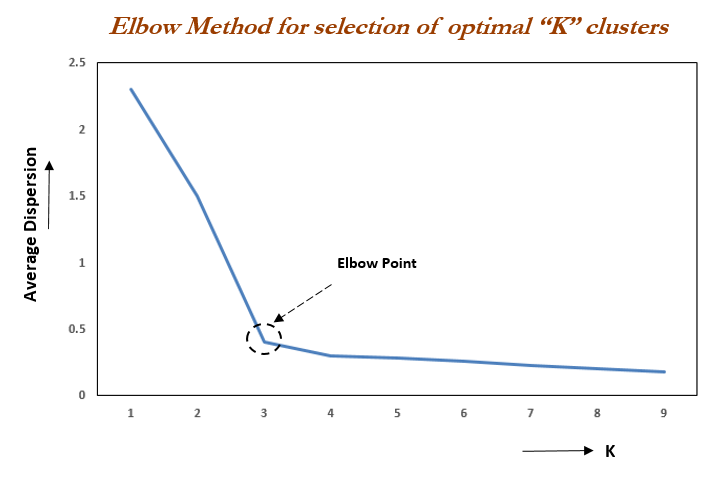

In [1]:
# Training SOM

import numpy as np
import matplotlib.pyplot as plt

def som(X, lrate, b, max_epoch, n_cluster):
    centroids = np.random.uniform(size=(n_cluster, len(X[0])))
    epoch = 0
    labels = []
    while epoch < max_epoch:
        for x in X:
            d = [sum((w - x) ** 2) for w in centroids]
            min_index = np.argmin(d)
            centroids[min_index] += lrate * (x - centroids[min_index])
        lrate *= b
        epoch += 1

    for x in X:
        d = [sum((w - x) ** 2) for w in centroids]
        min_index = np.argmin(d)
        labels.append(min_index)
    return centroids, labels

def draw(X, target, centroids):
    colors = 'rgbcmyk'
    for x, label in zip(X, target):
        plt.plot(x[0], x[1], colors[label] + '.')
    plt.plot(centroids[:, 0], centroids[:, 1], 'kx')


In [2]:
# Fungsi Elbow Method
def elbow_method(X, max_cluster):
    distortions = []
    for num_cluster in range(1, max_cluster + 1):
        centroids, labels = som(X, lrate=0.1, b=0.5, max_epoch=100, n_cluster=num_cluster)
        distortions.append(sum([np.linalg.norm(x - centroids[labels[i]]) ** 2 for i, x in enumerate(X)]))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_cluster + 1), distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for SOM')
    plt.show()

    elbow = np.diff(distortions, 2)
    best_k = -1
    max_val = -float('inf')
    for i, val in enumerate(elbow):
        if val > max_val:
            max_val = val
            best_k = i + 2

    return best_k

In [3]:
from google.colab import files

# Prompt to upload a file
uploaded = files.upload()

Saving Data SOM.csv to Data SOM.csv


In [4]:
import pandas as pd
data = pd.read_csv('Data SOM.csv')

In [5]:

# Hanya gunakan kolom A1 - A14 dan drop kolom CustomerID dan Class
data = data[data.columns[1:15]]
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159


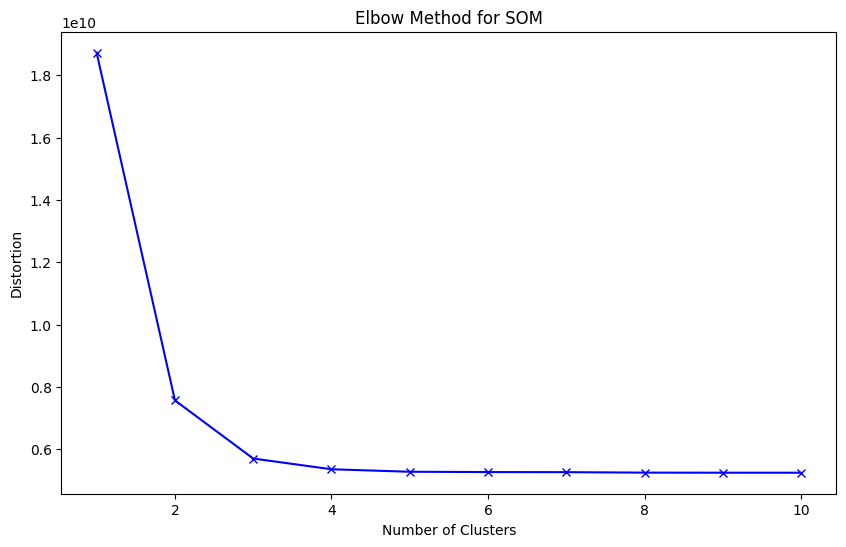

In [6]:
 # Tentukan jumlah cluster optimal dengan memanggil fungsi Elbow Method
best_k = elbow_method(data.values, 10)

Silhouette score: 0.9588989790038173


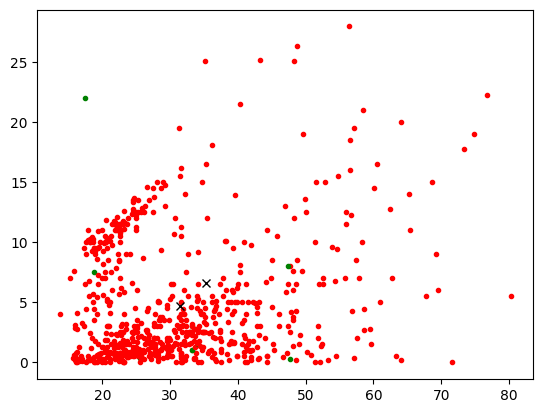

In [7]:
# Lakukan pelatihan dan pengujian data dengan memanggil fungsi SOM dan parameter cluster yang digunakan adalah best_k
# Lakukan tuning parameter untuk menghasilkan nilai silhouette yang paling optimal
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = data.iloc[:,1:15].values
centroids, labels = som(X, lrate= 0.1, b=0.4 , max_epoch=25 , n_cluster=best_k)

# Hitung Silhouette score
silhouette = silhouette_score(X, labels)
print('Silhouette score:', silhouette)
draw(X, labels, centroids)

# Analisis

1. Jelaskan konsep Elbow Method di SOM!
2. Berapa jumlah cluster paling optimal yang dihasilkan melalui Elbow Method?
3. Jelaskan pengaruh lrate, b, max_epoch, dan n_cluster pada tuning parameter yang anda lakukan!

1. Elbow Method merupakan suatu metode yang digunakan untuk membantu menentukan jumlah kluster optimal dalam algoritma clustering, seperti SOM. Tujuan utamanya adalah untuk menemukan titik dimana penambahan jumlah kluster tidak memberikan penurunan signifikan terhadap pengelompokan
2. Berdasarkan percobaan diatas, jumlah cluster paling optimal yanag dihasilkan adalah 2
3.  Learning rate yang lebih tinggi mungkin mempercepat konvergensi tetapi dapat menghasilkan hasil yang kurang stabil, nilai b yang lebih kecil mungkin menghasilkan klaster yang lebih terlokalisasi, sementara nilai yang lebih besar dapat membuat klaster lebih halus dan terhubung. Meningkatkan max_epoch dapat meningkatkan konvergensi dan pengklasteran